

# Project: Ratings and Revenue: What Influences Either Outcome for  a Film, and Is There a Correlation Between the Two? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will be analyzing the tmdb-movies database, containing information such as "revenue", "budget", "revenue", "rating", etc. Through this analysis, we will look at the biggest factors that influence reveneue and rating, and if there is a correlation between the two. 

In [2]:
# import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.shape

(10866, 21)

In [6]:
sum(df.duplicated())

1

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
Several rows in our dataset contain null values, the main offenders being "homepage", "tagline", "keywords", and "production companies." Luckily, we will not need "homepage", "tagline", and "keywords" in our data analysis, so we can simply drop those columns. We may need "production_companies," so we will have to drop rows that contain NA in that field, as well as any other field. There is also 1 duplicated row, so we will remove that as well. In the final steps, we will remove any "0" values, so we ensure we are only counting complete values. 

In [8]:
#Dropping homepage, keywords, and tagline columns 
df = df.drop(['homepage', 'keywords', 'tagline'], axis=1)

In [9]:
#Dropping all remaining rows with NA values
df = df.dropna()

In [10]:
#Check to ensure there are no null values remaining
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
#New Shape
df.shape

(9771, 18)

In [12]:
#Remove Duplicates
df.drop_duplicates(inplace = True)

In [13]:
#Check to ensure there are zero duplicates
sum(df.duplicated())

0

In [23]:
#Remove zeroes in budget column 
df = df[df.budget!= 0]
df.budget.head(100)

0      150000000
1      150000000
2      110000000
3      200000000
4      190000000
5      135000000
6      155000000
7      108000000
8       74000000
9      175000000
10     245000000
11     176000003
12      15000000
13      88000000
14     280000000
15      44000000
16      48000000
17     130000000
18      95000000
19     160000000
20     190000000
21      30000000
22     110000000
23      40000000
24      28000000
25     150000000
26      68000000
27      81000000
28      20000000
29      61000000
         ...    
73     150000000
76      99000000
77      35000000
78      25000000
79       2500000
80      34000000
81      80000000
82      17000000
83      35000000
84      11000000
85      31000000
86      35000000
87       4000000
89      50000000
90       5000000
91      50000000
93      10000000
94      64000000
96      11930000
97       8500000
98      10000000
99      30000000
102      4000000
104     30000000
105     23000000
106     15000000
107      5000000
108     530000

In [37]:
#Remove zeroes in revenue column 
df = df[df.revenue!= 0]
df.revenue.head(100)

0      1513528810
1       378436354
2       295238201
3      2068178225
4      1506249360
5       532950503
6       440603537
7       595380321
8      1156730962
9       853708609
10      880674609
11      183987723
12       36869414
13      243637091
14     1405035767
15      155760117
16      325771424
17      518602163
18      542351353
19      650523427
20      209035668
21       91709827
22      470490832
23      569651467
24      133346506
25      682330139
26      215863606
27      403802136
28       88346473
29      311256926
          ...    
77       48623572
78       52395996
79        5214043
80       63013281
81      466183544
82       24000000
83       61181942
84        1863315
85      104384188
86       95437994
87         187112
89        3324330
90       58978653
91      240360392
94       97571250
96       18340000
97       43528634
98       52882018
99      107597242
102      50163103
104      49263404
105      79799880
106      14860766
107      98450062
108      9

<a id='eda'></a>
## Exploratory Data Analysis

### Which Variables Most Influence Film Rating? 

#### Rating Distribution
First, we want to look at distribution of ratings. You can see that most of the ratings are between 5 and 7 and our histogram follows an almost normal, unimodal distribution. Running a quick summary of our vote averages below show us that the mean vote is 6.17, with a standard deviation of .79, min of 2.2, and max of 8.4


Text(0.5,1,'Film Ratings')

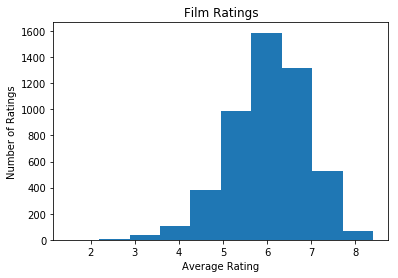

In [27]:
plt.hist(df.vote_average)
plt.ylabel('Number of Ratings')
plt.xlabel('Average Rating')
plt.title('Film Ratings')

In [39]:
df.vote_average.describe()

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

#### Rating vs. Popularity
First, lets look at the relationship between Rating and Popularity. As you can see, it looks like films that are more popular tend to score closer to the 7-8 range, as we can see with this left-skewed scatterplot. This is above the mean 6.17 rating. 

Text(0.5,1,'Rating vs Popularity')

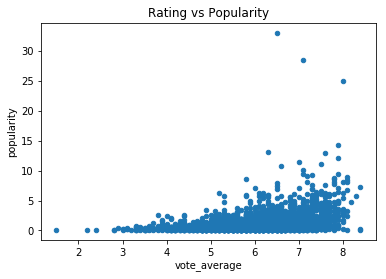

In [19]:
df.plot(x='vote_average', y='popularity', kind='scatter')
plt.title('Rating vs Popularity')

#### Rating vs Budget
Now lets compare a films budget to ratings. It looks like almost a normal distribution. 

Text(0.5,1,'Rating vs Budget')

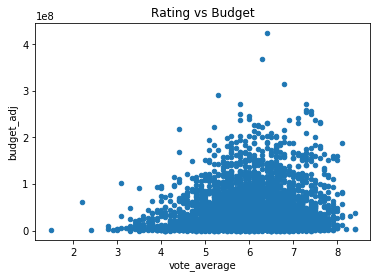

In [20]:
df.plot(x='vote_average', y='budget_adj', kind='scatter')
plt.title('Rating vs Budget')

#### Rating vs Runtime
Here we are comparing a film's runtime to its average rating. We can see here a slight left skew and long left tail. 

Text(0.5,1,'Rating vs Runtime')

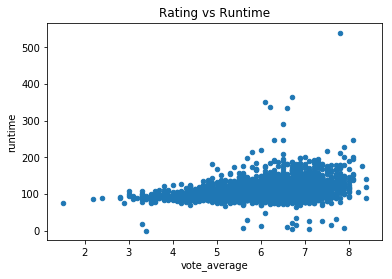

In [21]:
df.plot(x='vote_average', y='runtime', kind='scatter')
plt.title('Rating vs Runtime')

#### Rating vs Release Year
This is difficult to analyze because there are much more ratings in recent years. However, it looks like ratings have ballooned negatively in the past 10 years.


Text(0.5,1,'Rating vs Release Year')

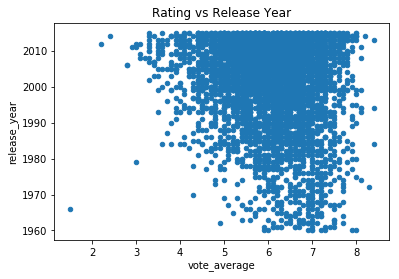

In [22]:
df.plot(x='vote_average', y='release_year', kind='scatter')
plt.title('Rating vs Release Year')

### Which Variables Most Influence Film Revenue? 

#### Revenue Distribution
It looks like film revenue is heavily skewed right, with almost all film revenues landing between 0 - 250,000,000. we can see our mean revenue lies around 138.7 million, with a standard deviation of 216.9 million, and a min of around $0 & max of 2.82 billion! That is a wide range. 

Text(0.5,1,'Film Budgets')

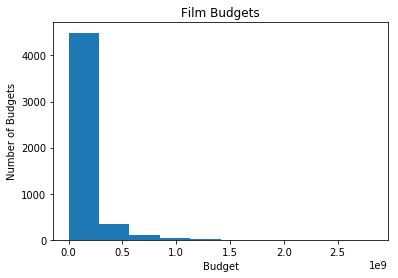

In [26]:
plt.hist(df.revenue_adj)
plt.ylabel('Number of Budgets')
plt.xlabel('Budget')
plt.title('Film Budgets')

In [47]:
df.revenue_adj.describe()

count    3.805000e+03
mean     1.387159e+08
std      2.169973e+08
min      2.370705e+00
25%      1.925371e+07
50%      6.284688e+07
75%      1.658054e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

#### Revenue vs Popularity
It appears that popularity has little effect on revenue, as there are no discernable trends based on this scatter plot comparison. However, there is much data here so it may be difficult to analyze from this view. 

Text(0.5,1,'Revenue vs Popularity')

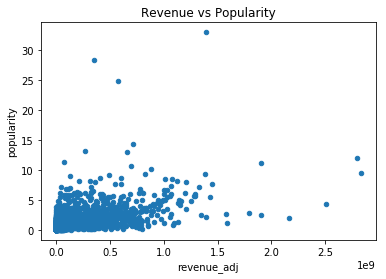

In [28]:
df.plot(x='revenue_adj', y='popularity', kind='scatter')
plt.title('Revenue vs Popularity')

#### Revenue vs Budget
This gives us an idea of whether a film is profitable or not. It looks like higher budgets sometimes bring in more revenue. 

Text(0.5,1,'Revenue vs Budget')

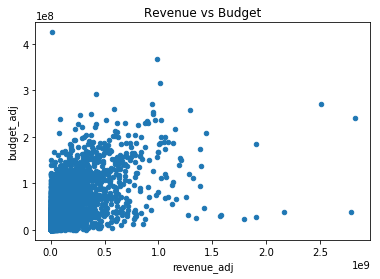

In [29]:
df.plot(x='revenue_adj', y='budget_adj', kind='scatter')
plt.title('Revenue vs Budget')

#### Revenue vs Runtime
It appears that there is a slight skew towards longer runtimes bringing in less revenue, however, there are many outliers that make this data unclear. 

Text(0.5,1,'Revenue vs Runtime')

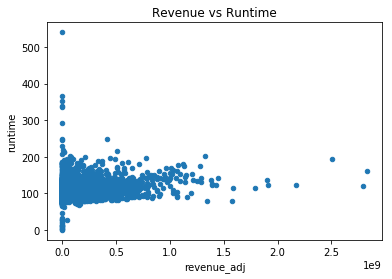

In [30]:
df.plot(x='revenue_adj', y='runtime', kind='scatter')
plt.title('Revenue vs Runtime')

#### Revenue vs Release Year
This may come as no surprise, but even with revenue being adjusted by inflation, it appears that film revenue has increased steadily over the years. You can see this with the left-skewed scatter plot, that shows the steady climb in revenue from 1960 to 2010+. 

Text(0.5,1,'Revenue vs Release Year')

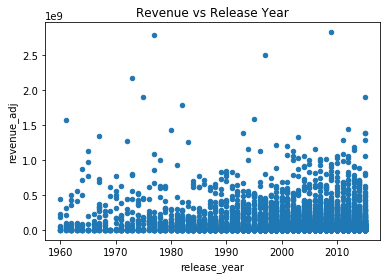

In [31]:
df.plot(x='release_year', y='revenue_adj', kind='scatter')
plt.title('Revenue vs Release Year')

### Is There a Coorelation Between Revenue and Rating? 
It looks like yes, as we can see in this left skewed scatter plot, revenue increases as average rating increases, until about 8, when revenue begins to decrease. 

Text(0.5,1,'Revenue vs Rating')

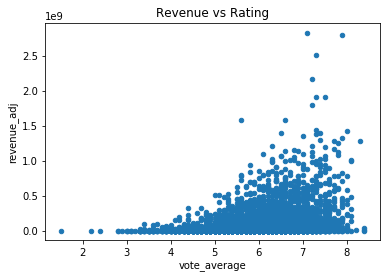

In [32]:
df.plot(x='vote_average', y='revenue_adj', kind='scatter')
plt.title('Revenue vs Rating')

<a id='conclusions'></a>
## Conclusions
In our analysis we looked at several factors and how they impacted both Revenue and Rating for a film. We saw that films were rated around 6 on average. But how could we predict whether a film wass to be rated above or below average? 

### Rating
Through this research, we discovered that there is no true predictor of film rating, however, we found that "Runtime" was a slight indication of movie rating. Longer movies tend to be rated more highly. This is likely that longer films tend to be more ambitious, and are more likely to result in positive reviews. Through Microsoft Excel, I calculated the r-score for runtime and film rating to be about .1238. We could create a model that calculates film rating based on runtime that would be correct only about 12.38% of the time. This model suggests that for every additional 10 minutes in length a film is, the rating is 12.38% likely to increase by .14. 

On a side note - I found it interesting that film budget was one of the worst predictors of film rating, as you would expect higher budget films to be of higher quality. 

### Revenue

While runtime may be the best predictor of film rating, it absolutely has no bearing on a films revenue. One of the best predictors of a film's revenue is its popularity. This should come as no surprise, as the more attention a film receives, the more people will see it. But even more of a predictor of film revenue is a film's budget. I found this surprising, as I can easily recall several large-budget films that have had sub-par box-office performance. But in this case, we can build a model that is 32.5% correct at predicting revenue based on a film's budget. This model states that for every 1 dollar in budget, the film is 32.5% likely to see a 2.75 dollar return on revenue. Thats not too bad. Keep in mind, there are several outliers in each scenario, as this explains about 1/3 of the results. 

### Revenue Vs. Rating
So is revenue correlated to rating? Yes, but in a non-linear regression. Running a linear regression on the correlation between revenue and rating will return a model that is quite inaccurate. This is due to a drop in revenue for films above a 7.5 rating. Unfortunately, a film can be rated very well - but if it does not have the popularity as we saw previously, it may not reach the mass public and generate revenue. Even worse if it is low-budget, as it will likely not have the marketing and advertising behind it to reach the masses. Take for instance the Number 1 rated film on IMDB - Shawshank Redemption. This film is regarded by many critics as one of the greatest films of all time, however, it grossed a measly 28.3 million in the box office, with a 25 million budget. Thats barely a profit at all. That said - films that score above 6.5 and below 7.5 tend to perform much better than films below 6.5. At this point films are regarded as "bad," and people are less likely to see them. 

So how do you create a film that does well in the box office and ratings? Well, perhaps you ensure that it has a great budget, and pr/popularity, and maybe make it a bit longer than average. But in summation, there is no silver bullet when it comes to successful films. There are a few trends that I have highlighted here, but with so many outliers, its difficult to to point to any 1 key factor. 

### Limitations & Future Analysis
We unfortunately had to remove about more than half of our data due to null values, as well as "0" values. A more complete dataset may provide more information to yield more confident analysis of these relationships. More granular future analysis could be conducted to determine influencing factors on film rating and revenue. For instance, one could look at the effect of seasonality and film genre on overall rating and revenue. Is there a specfic season that performs best in terms of revenue? Is there a specific genre that performs best in terms of rating or revenue? Which season is most successful in terms of revenue for each genre? These could be separate projects within themselves. There is a multitude of data that can be narrowly accessed to develop additional insights to what we have developed here. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])